In [60]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
years = pd.read_csv('lifeexpectancy-verbose.csv',low_memory=False)
years.head()

,index,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,AMR,Americas,WB_LMI,Lower_middle_income,NIC,Nicaragua,MLE,Male,68,68.0
1,1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_HI,High_income,IRL,Ireland,MLE,Male,69,69.3
2,2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,YEM,Yemen,BTSX,Both sexes,61,61.0
3,3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,AFR,Africa,WB_LMI,Lower_middle_income,NGA,Nigeria,FMLE,Female,48,48.0
4,4,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,SEAR,South_East Asia,WB_LMI,Lower_middle_income,THA,Thailand,FMLE,Female,19,19.0


In [6]:
drinks = pd.read_csv('drinks.csv',low_memory=False)
drinks.head()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,Afghanistan,0,0,0,0.0
1,1,Albania,89,132,54,4.9
2,2,Algeria,25,0,14,0.7
3,3,Andorra,245,138,312,12.4
4,4,Angola,217,57,45,5.9


In [7]:
years.shape

(6408, 17)

In [8]:
years.describe()

,index,YearCode,YearDisplay,DisplayValue,Numeric
count,6408.000000,6408.000000,6408.000000,6408.000000,6408.000000
mean,3203.500000,2005.000936,2005.000936,48.143571,48.145528
std,1849.974594,8.861084,8.861084,23.774807,23.775598
min,0.000000,1990.000000,1990.000000,11.000000,11.000000
25%,1601.750000,2000.000000,2000.000000,20.000000,20.000000
50%,3203.500000,2012.000000,2012.000000,57.000000,56.979710
75%,4805.250000,2013.000000,2013.000000,69.000000,69.000000
max,6407.000000,2013.000000,2013.000000,87.000000,87.154570


In [9]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          6408 non-null   int64  
 1   GhoCode                        6408 non-null   object 
 2   GhoDisplay                     6408 non-null   object 
 3   PublishStateCode               6408 non-null   object 
 4   PublishStateDisplay            6408 non-null   object 
 5   YearCode                       6408 non-null   int64  
 6   YearDisplay                    6408 non-null   int64  
 7   RegionCode                     6408 non-null   object 
 8   RegionDisplay                  6408 non-null   object 
 9   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 10  WorldBankIncomeGroupDisplay    5244 non-null   object 
 11  CountryCode                    6408 non-null   object 
 12  CountryDisplay                 6408 non-null   o

In [11]:
years['GhoDisplay'].unique()

array(['Life expectancy at birth (years)',
       'Healthy life expectancy (HALE) at birth (years)',
       'Life expectancy at age 60 (years)'], dtype=object)

In [24]:
years['YearDisplay'].unique()

array([1990, 2012, 2000, 2013], dtype=int64)

In [54]:
years['WorldBankIncomeGroupDisplay'].unique()

array(['Lower_middle_income', 'High_income', 'Low_income',
       'Upper_middle_income', nan], dtype=object)

In [33]:
#φιλτραρουμε για  "Life expectancy at birth (years)"
years_birth = years[years['GhoCode'] == 'WHOSIS_000001']

In [52]:
years_both = years_birth[years_birth['SexDisplay']== 'Both sexes']

In [32]:
# years[(years['CountryDisplay']=='Greece') & (years['GhoCode'] == 'WHOSIS_000001')].sort_values('YearDisplay', ascending=False)

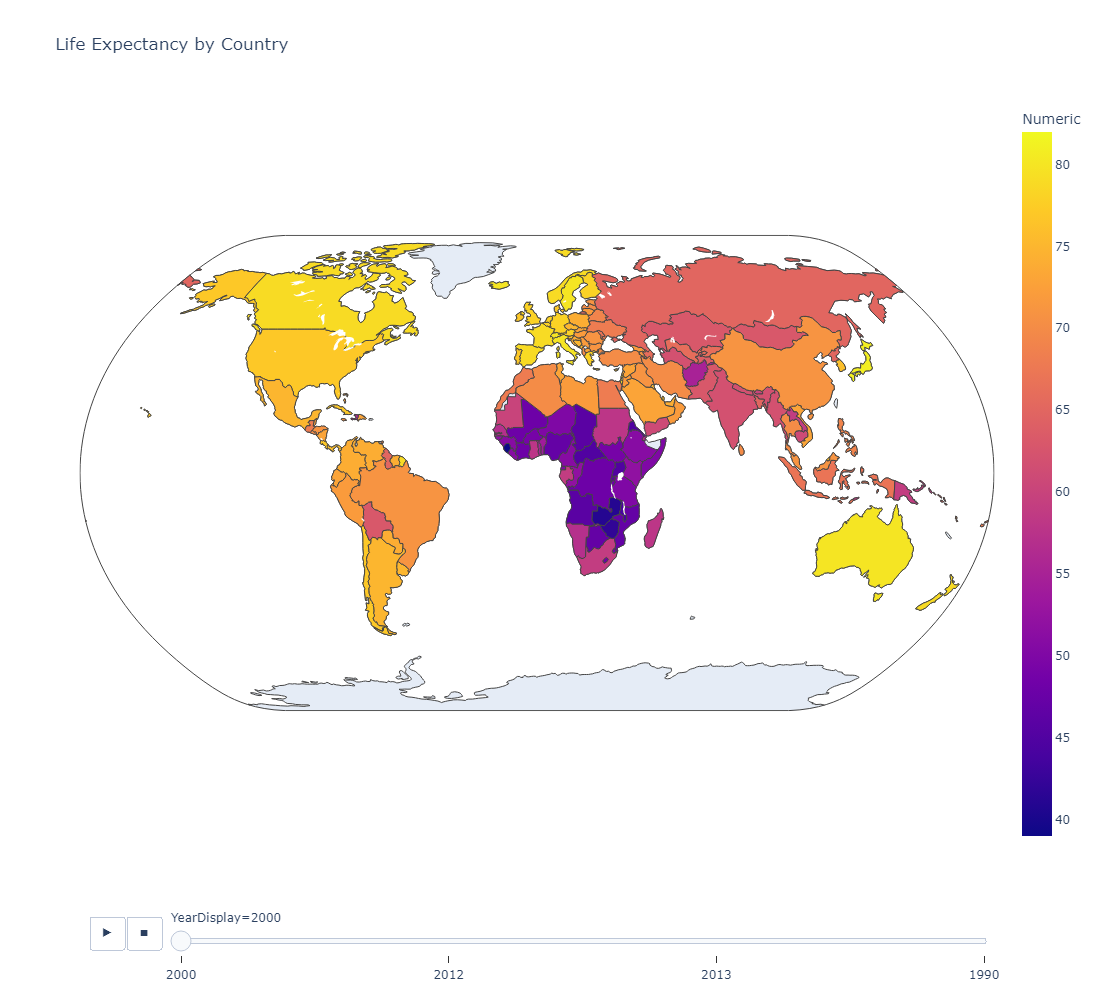

In [73]:
fig = px.choropleth(years_both, locations='CountryCode', color='Numeric', hover_name='CountryDisplay',
                    projection='natural earth', animation_frame='YearDisplay',
                    title='Life Expectancy by Country',width = 1000,height =1000)
 
fig.show()

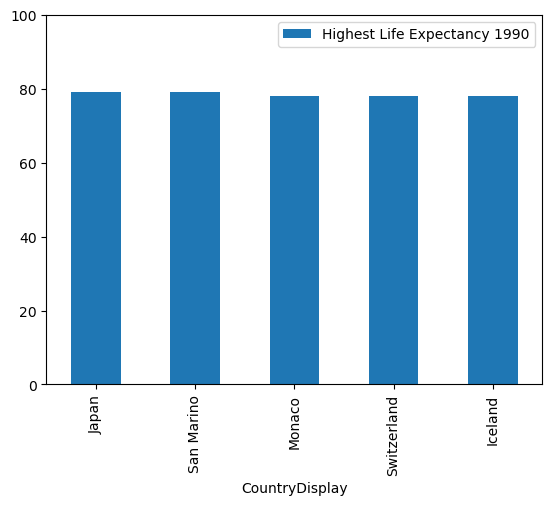

In [100]:
#Θα δουμε σε βαθος δεκαετιων top 5 & bottom 5 χωρων σε προσδοκιμο ζωης
top1990 = years_both[years_both['YearDisplay'] == 1990].sort_values('Numeric', ascending = False).head(5)
top1990[['CountryDisplay','Numeric']].set_index('CountryDisplay').plot(kind ='bar').set_ylim(0,100)
plt.legend(['Highest Life Expectancy 1990'])

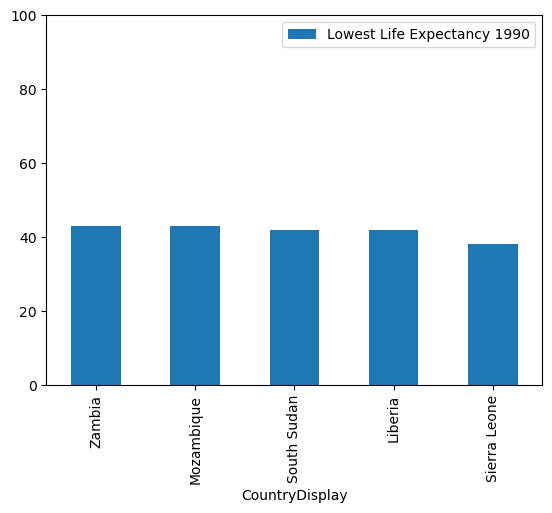

In [101]:
bottom1990 = years_both[years_both['YearDisplay'] == 1990].sort_values('Numeric', ascending = False).tail(5)
bottom1990[['CountryDisplay','Numeric']].set_index('CountryDisplay').plot(kind ='bar').set_ylim(0,100)
plt.legend(['Lowest Life Expectancy 1990'])

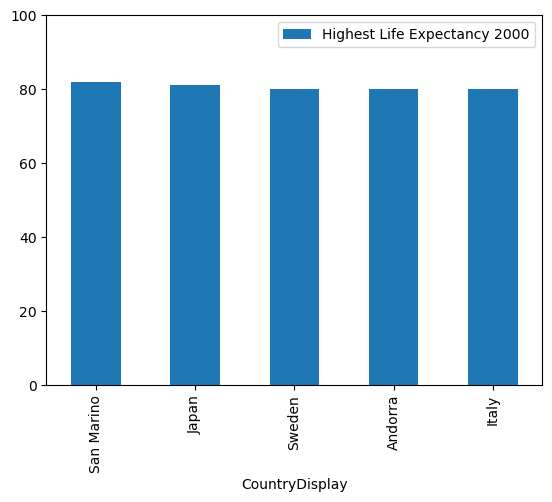

In [102]:
top2000 = years_both[years_both['YearDisplay'] == 2000].sort_values('Numeric', ascending = False).head(5)
top2000[['CountryDisplay','Numeric']].set_index('CountryDisplay').plot(kind ='bar').set_ylim(0,100)
plt.legend(['Highest Life Expectancy 2000'])

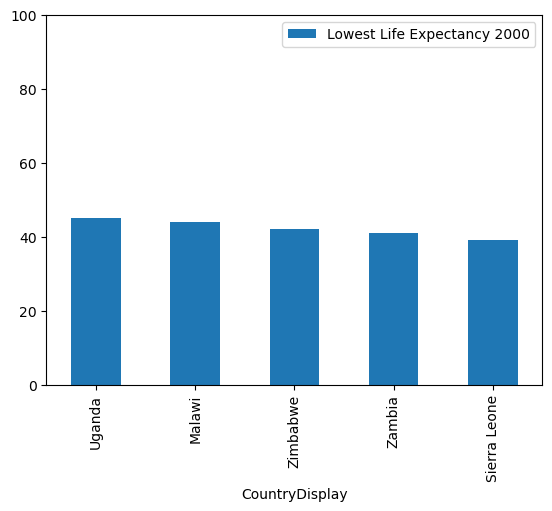

In [103]:
bottom2000 = years_both[years_both['YearDisplay'] == 2000].sort_values('Numeric', ascending = False).tail(5)
bottom2000[['CountryDisplay','Numeric']].set_index('CountryDisplay').plot(kind ='bar').set_ylim(0,100)
plt.legend(['Lowest Life Expectancy 2000'])

In [55]:
top2013 = years_both[years_both['YearDisplay'] == 2013].sort_values('Numeric', ascending = False).head(5)

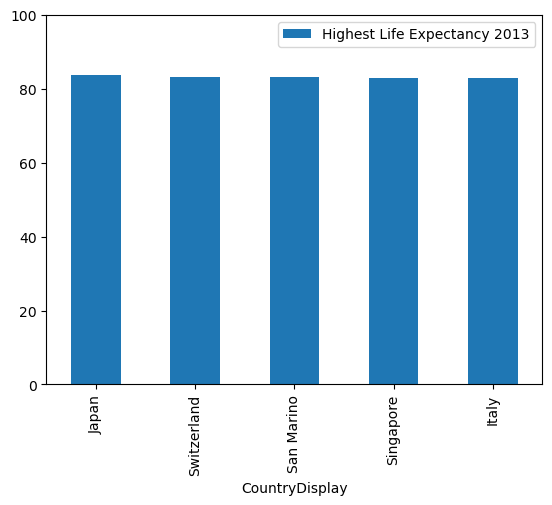

In [104]:
top2013[['CountryDisplay','Numeric']].set_index('CountryDisplay').plot(kind ='bar').set_ylim(0,100)
plt.legend(['Highest Life Expectancy 2013'])

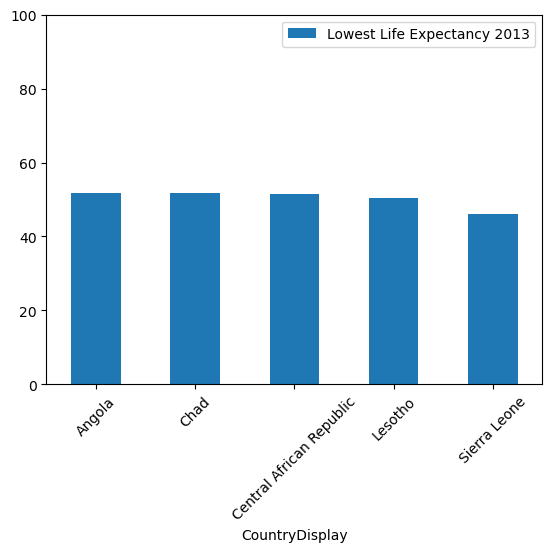

In [109]:
bottom2013 = years_both[years_both['YearDisplay'] == 2013].sort_values('Numeric', ascending = False).tail(5)
bottom2013[['CountryDisplay','Numeric']].set_index('CountryDisplay').plot(kind ='bar',rot =45).set_ylim(0,100)
plt.legend(['Lowest Life Expectancy 2013'])

In [ ]:
#θα δουμε σε βαθος δεκαετιων την κατανομη του income

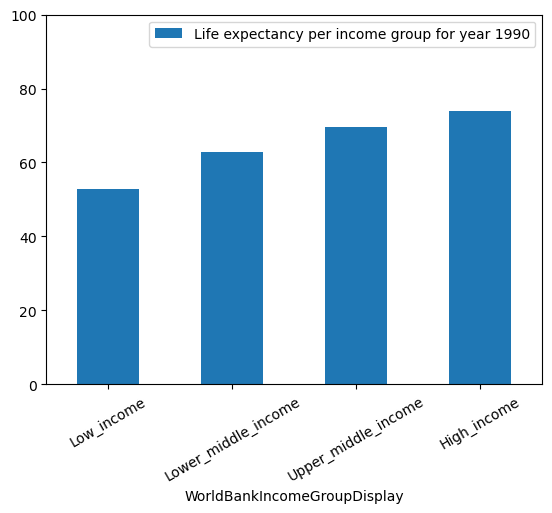

In [114]:
income1990 = years_both[years_both['YearDisplay'] == 1990]
income1990.groupby('WorldBankIncomeGroupDisplay')[['Numeric']].mean('Numeric').sort_values('Numeric').plot(kind = 'bar',rot =30).set_ylim(0,100)
plt.legend(['Life expectancy per income group for year 1990'])

In [62]:
income2000 = years_both[years_both['YearDisplay'] == 2000]

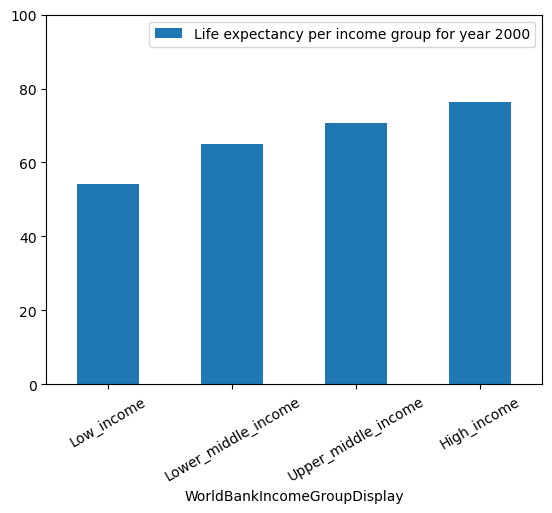

In [115]:
income2000.groupby('WorldBankIncomeGroupDisplay')[['Numeric']].mean('Numeric').sort_values('Numeric').plot(kind = 'bar',rot = 30).set_ylim(0,100)
plt.legend(['Life expectancy per income group for year 2000'])

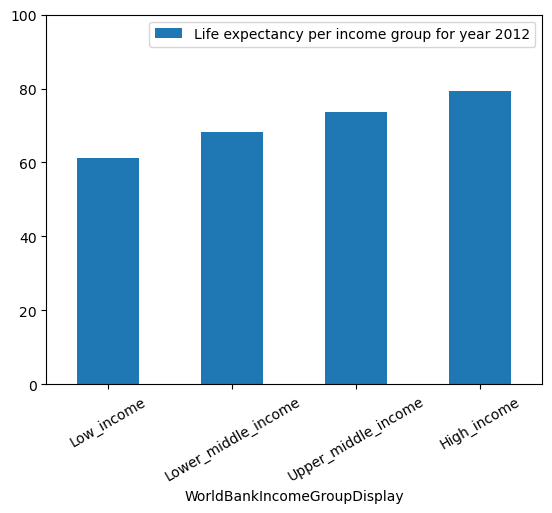

In [116]:
income2012 = years_both[years_both['YearDisplay'] == 2012]
income2012.groupby('WorldBankIncomeGroupDisplay')[['Numeric']].mean('Numeric').sort_values('Numeric').plot(kind = 'bar',rot =30).set_ylim(0,100)
plt.legend(['Life expectancy per income group for year 2012'])

In [66]:
codes = years_both[['CountryCode','CountryDisplay']]
codes['country'] = codes['CountryDisplay']
codes

C:\Users\Panagiotis\AppData\Local\Temp\ipykernel_13532\2768466248.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CountryCode,CountryDisplay,country
2,YEM,Yemen,Yemen
5,CHL,Chile,Chile
6,ZWE,Zimbabwe,Zimbabwe
13,JPN,Japan,Japan
23,LCA,Saint Lucia,Saint Lucia
...,...,...,...
6378,UZB,Uzbekistan,Uzbekistan
6388,BEL,Belgium,Belgium
6393,CIV,Côte d'Ivoire,Côte d'Ivoire
6403,MAR,Morocco,Morocco


In [68]:
mergeddrinks = pd.merge(left = drinks, right  = codes, on = 'country', how = 'left')

In [69]:
mergeddrinks.loc[667,"CountryCode"] = 'USA'
mergeddrinks.loc[665,"CountryCode"] = 'GBR'
mergeddrinks.loc[519,"CountryCode"] = 'KOR'
mergeddrinks.loc[680,"CountryCode"] = 'VEN'
mergeddrinks.loc[77,"CountryCode"] = 'BOL'

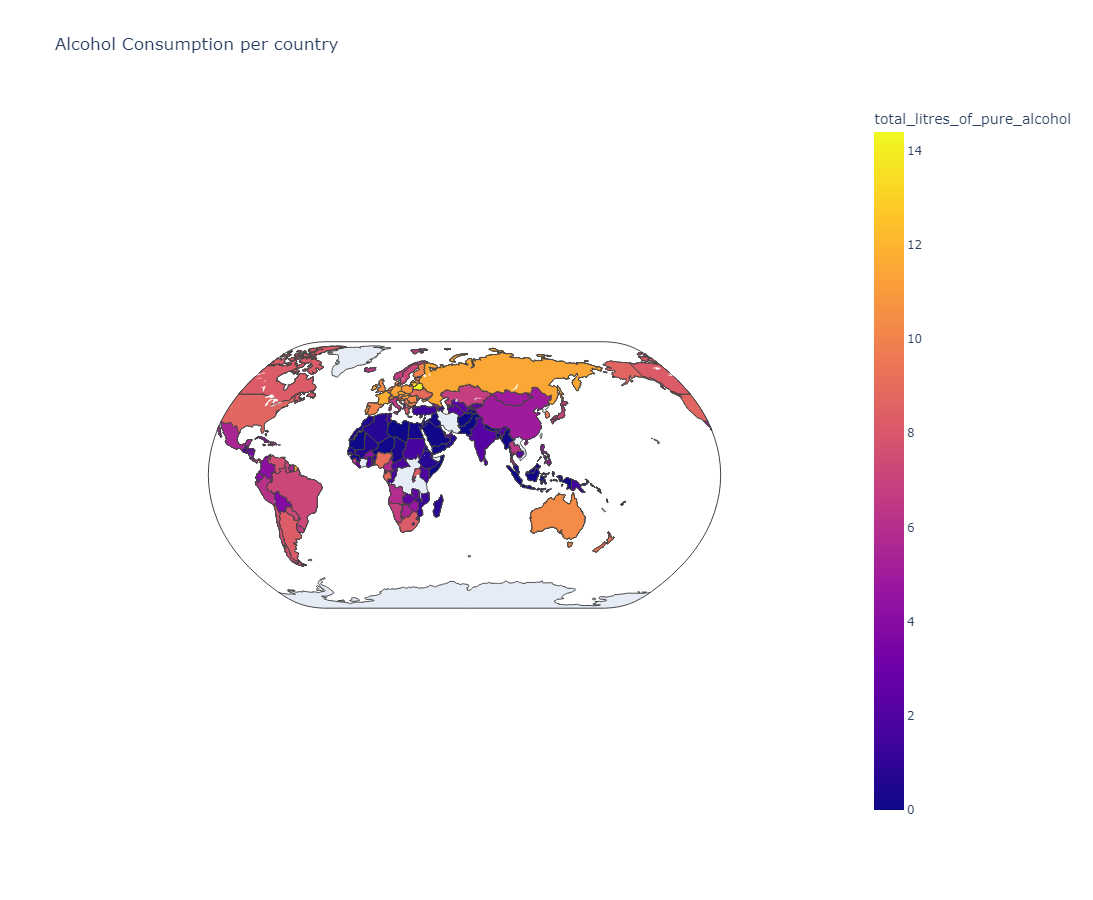

In [70]:
fig = px.choropleth(mergeddrinks, locations='CountryCode', color='total_litres_of_pure_alcohol', hover_name='CountryDisplay',
                    projection='natural earth',
                    title='Alcohol Consumption per country',width = 1200,height =900)
 
fig.show()

<Axes: xlabel='country'>

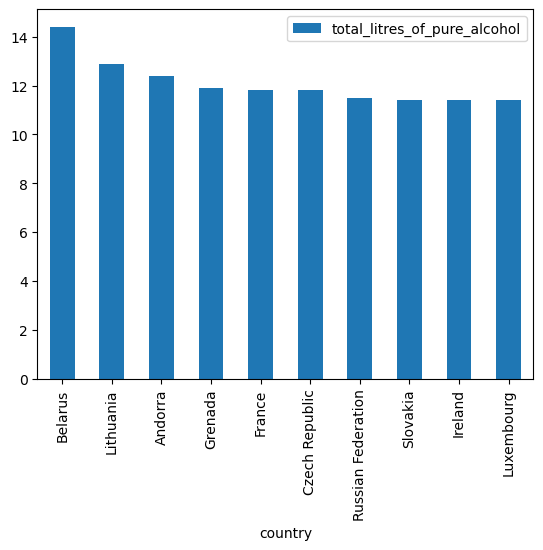

In [95]:
top10_consumer = mergeddrinks.groupby('country').mean()[['total_litres_of_pure_alcohol']].sort_values('total_litres_of_pure_alcohol', ascending = False).head(10)
top10_consumer.plot(kind = 'bar')

<Axes: xlabel='country'>

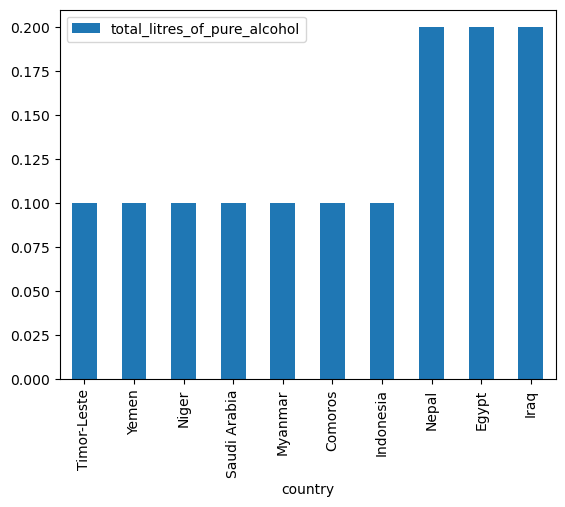

In [99]:
#θελουμε απο αυτους που καταναλωνουν,ποιοι καταναλωνουν το λιγοτερο
bottom10_consumer = mergeddrinks[mergeddrinks['total_litres_of_pure_alcohol'] > 0]
bottom10_consumer = bottom10_consumer.groupby('country').mean()[['total_litres_of_pure_alcohol']].sort_values('total_litres_of_pure_alcohol', ascending = True).head(10)
bottom10_consumer.plot(kind = 'bar')

In [126]:
mergeddrinks2 = pd.merge(left = drinks, right  = years_both, left_on = 'country',right_on ='CountryDisplay', how = 'left')
mergeddrinks2.head()

,index_x,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,index_y,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,0,Afghanistan,0,0,0,0.0,1512.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013.0,2013.0,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61.0,61.25205
1,0,Afghanistan,0,0,0,0.0,1935.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990.0,1990.0,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,49.0,49.00000
2,0,Afghanistan,0,0,0,0.0,2498.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000.0,2000.0,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,55.0,55.00000
3,0,Afghanistan,0,0,0,0.0,5761.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012.0,2012.0,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60.0,60.00000
4,1,Albania,89,132,54,4.9,1475.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012.0,2012.0,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,BTSX,Both sexes,74.0,74.00000


In [128]:
mergeddrinks2 = mergeddrinks2[mergeddrinks2['total_litres_of_pure_alcohol'] > 0]
mergeddrinks2.head()

,index_x,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,index_y,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
4,1,Albania,89,132,54,4.9,1475.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012.0,2012.0,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,BTSX,Both sexes,74.0,74.00
5,1,Albania,89,132,54,4.9,1719.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013.0,2013.0,EUR,Europe,NaN,NaN,ALB,Albania,BTSX,Both sexes,74.0,74.13
6,1,Albania,89,132,54,4.9,3238.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000.0,2000.0,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,BTSX,Both sexes,70.0,70.00
7,1,Albania,89,132,54,4.9,4732.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990.0,1990.0,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,BTSX,Both sexes,69.0,69.00
8,2,Algeria,25,0,14,0.7,675.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990.0,1990.0,AFR,Africa,WB_UMI,Upper_middle_income,DZA,Algeria,BTSX,Both sexes,68.0,68.00


<Axes: xlabel='total_litres_of_pure_alcohol', ylabel='Numeric'>

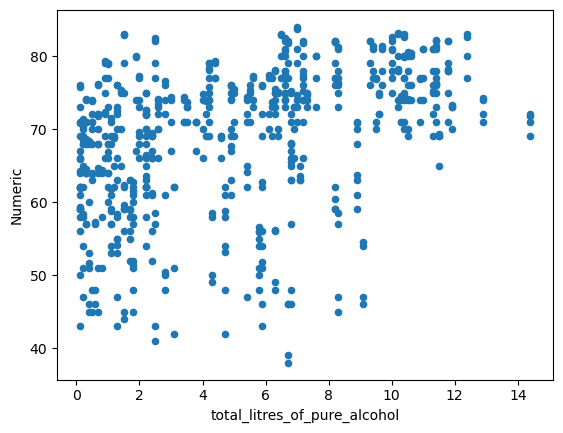

In [135]:
x = mergeddrinks2.total_litres_of_pure_alcohol.values
y= mergeddrinks2.Numeric.values
mergeddrinks2.plot(kind ='scatter',x='total_litres_of_pure_alcohol',y='Numeric')

<Axes: xlabel='total_litres_of_pure_alcohol', ylabel='Numeric'>

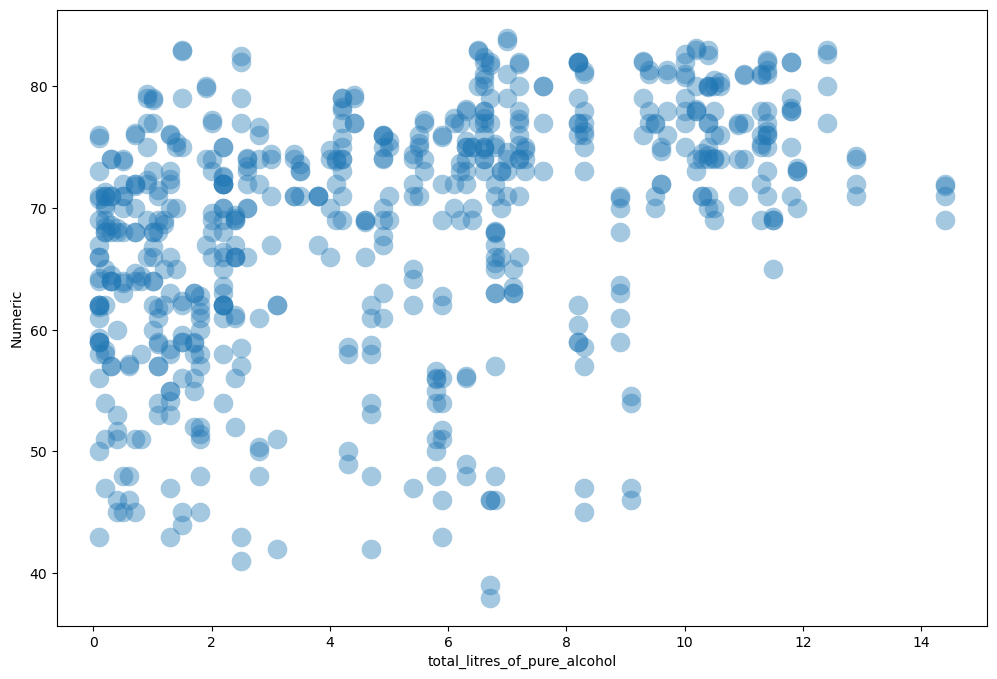

In [144]:
plt.figure(figsize=(12,8)) 
sns.scatterplot(x='total_litres_of_pure_alcohol',y='Numeric',data=mergeddrinks2,s=200,linewidth=0,alpha=0.4)